In [149]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score, accuracy_score

### Loading file

In [87]:
df = pd.read_excel(r"C:\Users\ACER ASPIRE\Downloads\ML project\sydney_rain prediction.xlsx", header=0)

In [88]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
3333,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
3334,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
3335,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


In [89]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [91]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737


### Preprocessing (Filling NAN values or missing data)

In [93]:
for column in df.columns:
  if df[column].dtype != "object":
    df[column].fillna(value=df[column].mean(), inplace= True)
  elif df[column].dtype == "object":
    df[column].fillna(value=df[column].mode(), inplace= True)

In [94]:
df=pd.get_dummies(df,drop_first= True)

In [95]:
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,True,True
1,2008-02-02,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,True,True
2,2008-02-03,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,True,True
3,2008-02-04,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,True,True
4,2008-02-05,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,2017-06-21,8.6,19.6,0.0,2.000000,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,False,False
3333,2017-06-22,9.3,19.2,0.0,2.000000,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,False,False
3334,2017-06-23,9.4,17.7,0.0,2.400000,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,False,False
3335,2017-06-24,10.1,19.3,0.0,1.400000,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,False,False


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   MinTemp           3337 non-null   float64       
 2   MaxTemp           3337 non-null   float64       
 3   Rainfall          3337 non-null   float64       
 4   Evaporation       3337 non-null   float64       
 5   Sunshine          3337 non-null   float64       
 6   Humidity9am       3337 non-null   float64       
 7   Humidity3pm       3337 non-null   float64       
 8   Pressure9am       3337 non-null   float64       
 9   Pressure3pm       3337 non-null   float64       
 10  Cloud9am          3337 non-null   float64       
 11  Cloud3pm          3337 non-null   float64       
 12  Temp9am           3337 non-null   float64       
 13  Temp3pm           3337 non-null   float64       
 14  RainToday_Yes     3337 n

In [97]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156


## checking outlier  using boxplot

<Axes: ylabel='Temp9am'>

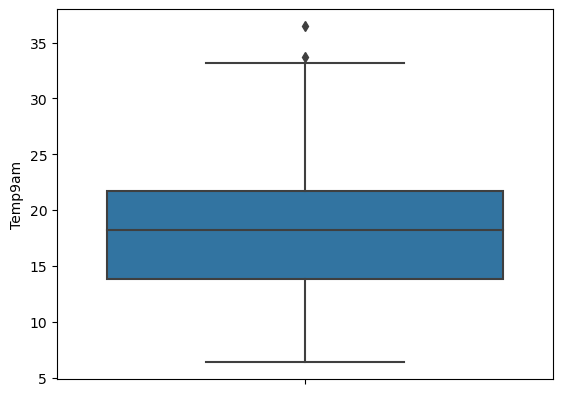

In [98]:
sn.boxplot(y='Temp9am', data=df)

<Axes: ylabel='Temp3pm'>

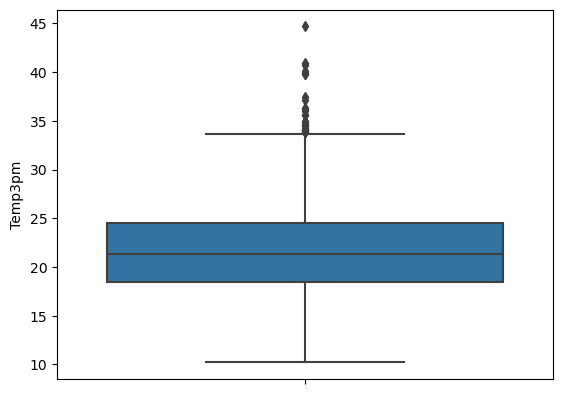

In [99]:
sn.boxplot(y='Temp3pm', data=df)

<Axes: ylabel='Pressure9am'>

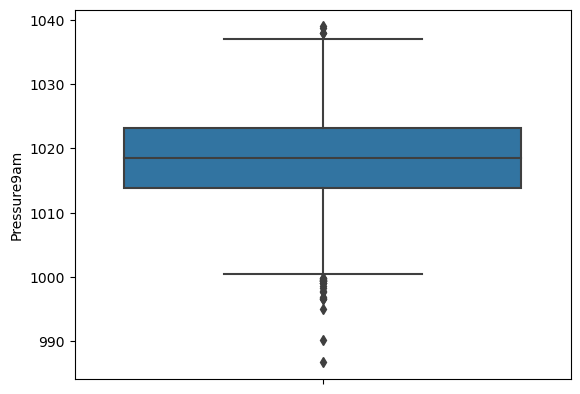

In [100]:
sn.boxplot(y='Pressure9am', data=df)

<Axes: ylabel='Pressure3pm'>

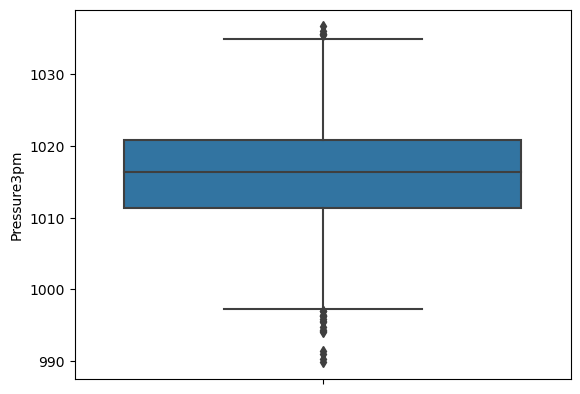

In [101]:
sn.boxplot(y='Pressure3pm', data=df)

<Axes: ylabel='Cloud9am'>

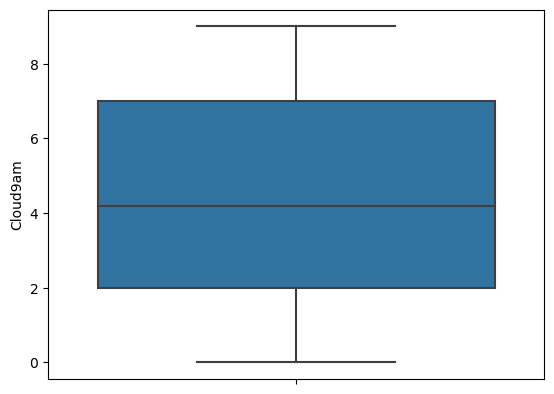

In [102]:
sn.boxplot(y='Cloud9am', data=df)

<Axes: ylabel='Cloud3pm'>

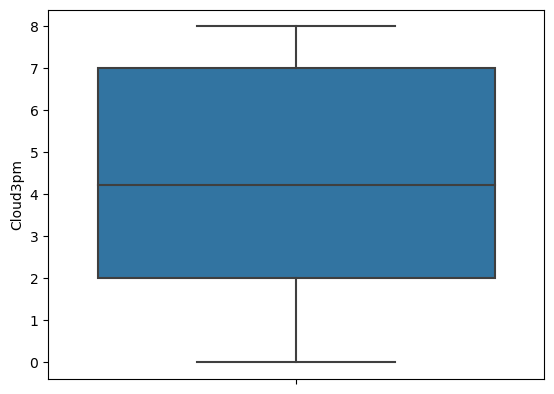

In [103]:
sn.boxplot(y='Cloud3pm', data=df)

<Axes: ylabel='Sunshine'>

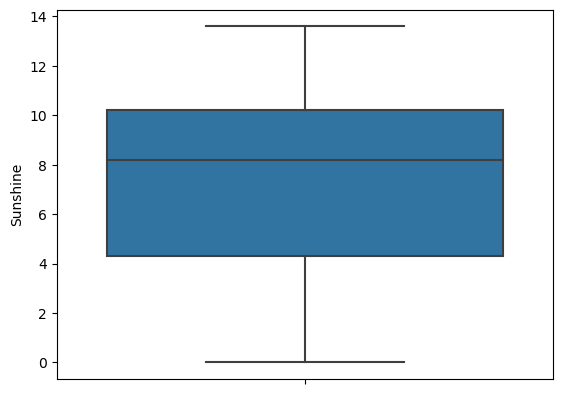

In [104]:
sn.boxplot(y='Sunshine', data=df)

<Axes: ylabel='Humidity9am'>

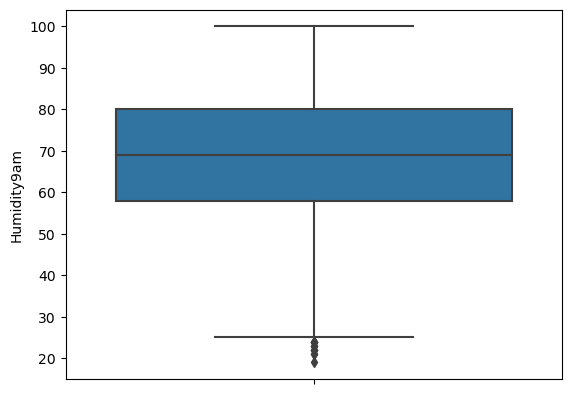

In [105]:
sn.boxplot(y='Humidity9am', data=df)

<Axes: ylabel='Humidity3pm'>

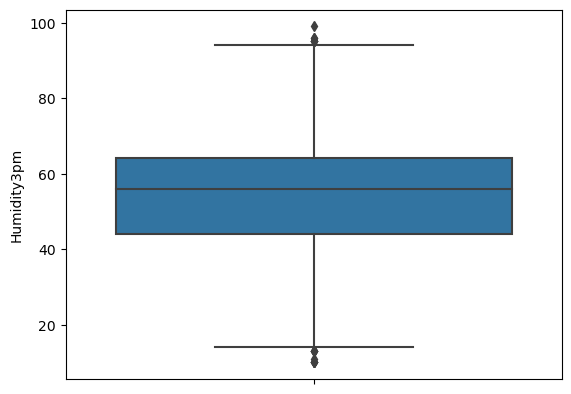

In [106]:
sn.boxplot(y='Humidity3pm', data=df)

<Axes: ylabel='Evaporation'>

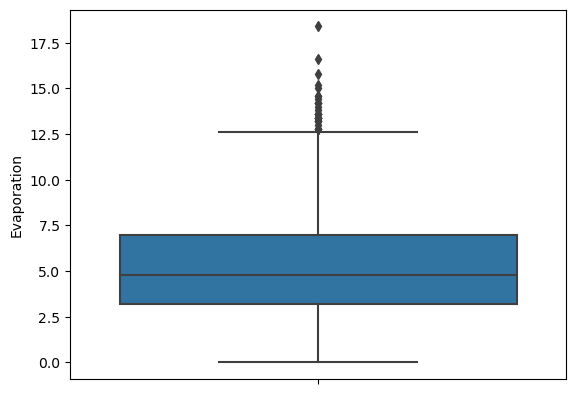

In [107]:
sn.boxplot(y='Evaporation', data=df)

<Axes: ylabel='MaxTemp'>

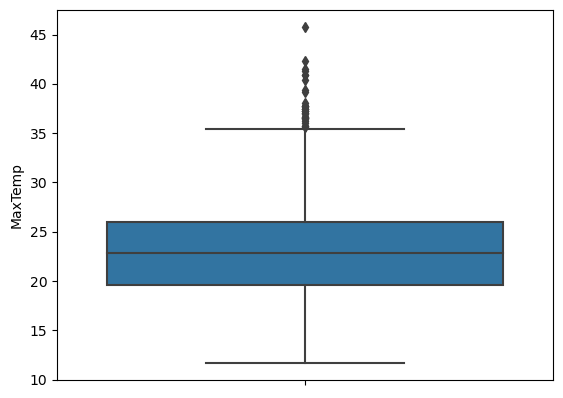

In [108]:
sn.boxplot(y='MaxTemp', data=df)

<Axes: ylabel='MinTemp'>

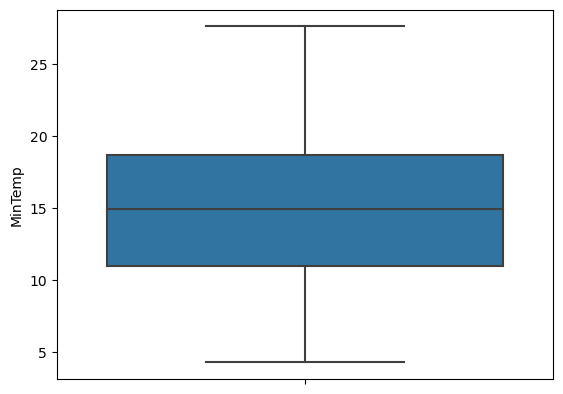

In [109]:
sn.boxplot(y='MinTemp', data=df)

<Axes: xlabel='Rainfall'>

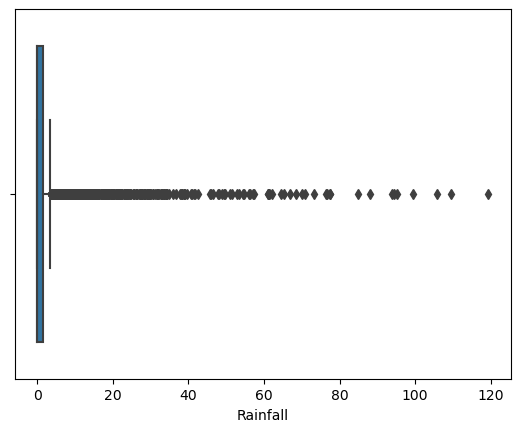

In [110]:
sn.boxplot(x='Rainfall', data=df)

In [111]:
for column in df.columns:
    if df[column].dtype!='bool':
        if df[column].dtype!='datetime64[ns]':
            print(column)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


## Filling outlier with Upper and Lower bound using IQR

In [112]:
for column in df.columns:
    if df[column].dtype!='bool':
        if df[column].dtype!='datetime64[ns]':
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3-q1
            upper_limit = q3 + (1.5 * iqr)
            lower_limit = q1 - (1.5 * iqr)
            df.loc[(df[column]>upper_limit), column] = upper_limit
            df.loc[(df[column]<lower_limit), column] = lower_limit

In [113]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,2012-10-16 01:24:34.737788672,14.865057,22.977196,0.868919,5.174396,7.179374,68.238300,54.703353,1018.360271,1016.030446,4.181523,4.218660,17.818813,21.510199
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,25.000000,14.000000,999.850000,997.050000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,35.600000,3.500000,12.700000,13.600000,100.000000,94.000000,1037.050000,1035.050000,9.000000,8.000000,33.550000,33.650000
std,NaN,4.551593,4.409312,1.393618,2.714802,3.801737,15.025889,16.229354,6.946585,6.968893,2.505491,2.409531,4.890985,4.219776


<Axes: ylabel='MaxTemp'>

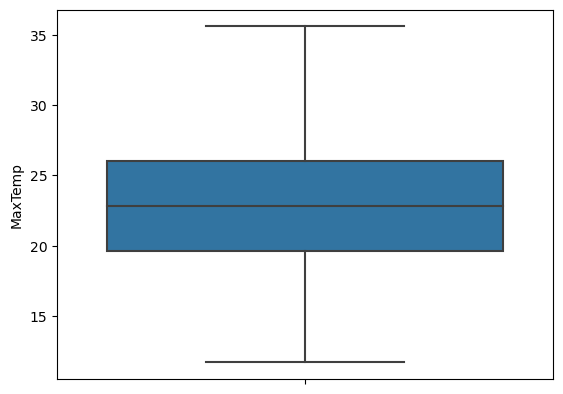

In [114]:
sn.boxplot(y='MaxTemp', data=df)

<Axes: ylabel='Temp3pm'>

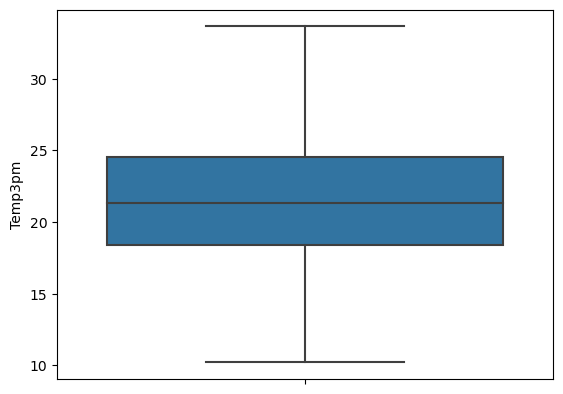

In [115]:
sn.boxplot(y='Temp3pm', data=df)

In [116]:
print(df['Date'].dtype)

datetime64[ns]


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   MinTemp           3337 non-null   float64       
 2   MaxTemp           3337 non-null   float64       
 3   Rainfall          3337 non-null   float64       
 4   Evaporation       3337 non-null   float64       
 5   Sunshine          3337 non-null   float64       
 6   Humidity9am       3337 non-null   float64       
 7   Humidity3pm       3337 non-null   float64       
 8   Pressure9am       3337 non-null   float64       
 9   Pressure3pm       3337 non-null   float64       
 10  Cloud9am          3337 non-null   float64       
 11  Cloud3pm          3337 non-null   float64       
 12  Temp9am           3337 non-null   float64       
 13  Temp3pm           3337 non-null   float64       
 14  RainToday_Yes     3337 n

### Seperating X any Y variable  from df data Fame

In [118]:
df.drop(columns=("Date"),inplace=True)

In [119]:
x=df.iloc[:,df.columns!='RainTomorrow_Yes']

In [120]:
y=df['RainTomorrow_Yes']

In [121]:
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,True
1,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,True
2,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,True
3,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,True
4,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.000000,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,False
3333,9.3,19.2,0.0,2.000000,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,False
3334,9.4,17.7,0.0,2.400000,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,False
3335,10.1,19.3,0.0,1.400000,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,False


### Seperating data using train test split

In [126]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2)

# LogisticRegression

In [127]:
lr= LogisticRegression()

In [128]:
lr.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
y_pre= lr.predict(x_test)

In [134]:
confusion_matrix(y_test,y_pre)

array([[475,  38],
       [ 62,  93]], dtype=int64)

In [135]:
lr.predict_proba(x_test)

array([[0.97996652, 0.02003348],
       [0.96581211, 0.03418789],
       [0.63482922, 0.36517078],
       ...,
       [0.3438367 , 0.6561633 ],
       [0.96699225, 0.03300775],
       [0.92870893, 0.07129107]])

In [137]:
precision_score(y_test,y_pre)

0.7099236641221374

In [138]:
recall_score(y_test,y_pre)

0.6

In [139]:
roc_auc_score(y_test,y_pre)

0.7629629629629631

# DecisionTreeClassifier

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
dt= DecisionTreeClassifier(max_depth=4)

In [142]:
dt.fit(x_train,y_tarin)

DecisionTreeClassifier(max_depth=4)

In [143]:
dt.predict(x_test)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [145]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [146]:
confusion_matrix(y_train, y_train_pred)

array([[1932,   27],
       [ 702,    8]], dtype=int64)

In [147]:
confusion_matrix(y_test, y_test_pred)

array([[502,  11],
       [154,   1]], dtype=int64)

In [150]:
accuracy_score(y_test, y_test_pred)

0.7529940119760479

# Bagging

In [153]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [154]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [156]:
bag_clf.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [158]:
confusion_matrix(y_test, bag_clf.predict(x_test))

array([[481,  32],
       [ 75,  80]], dtype=int64)

In [159]:
accuracy_score(y_test, bag_clf.predict(x_test))

0.8398203592814372

# Randamforest

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [162]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [163]:
confusion_matrix(y_test, rf_clf.predict(x_test))

array([[481,  32],
       [ 79,  76]], dtype=int64)

In [164]:
accuracy_score(y_test, rf_clf.predict(x_test))

0.8338323353293413

# Gradient Boosting

In [165]:
from sklearn.ensemble import GradientBoostingClassifier

In [166]:
gbc_clf = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000, max_depth = 1)

gbc_clf.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [167]:
accuracy_score(y_test, gbc_clf.predict(x_test))

0.8532934131736527

In [169]:
confusion_matrix(y_test, gbc_clf.predict(x_test))

array([[490,  23],
       [ 75,  80]], dtype=int64)

Views about the problem statement

The problem statement is clear and well-defined. It outlines the task of creating a machine learning model to 
predict rainfall, which is a common problem in meteorology and has practical applications in various sectors like agriculture, 
disaster management, and urban planning.

Approach to solving the task

I would start by loading the dataset and performing data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features if necessary.
I would split the dataset into training and testing sets.
I would train various classification models including decision tree classifiers and ensemble methods such as Random Forest, Bagging, and Boosting.
After training the models, I would evaluate their performance using metrics such as accuracy, precision, recall, and confusion matrix.
Finally, I would select the best-performing model based on evaluation metrics and analyze why it performed better than other models.

Available ML model options

Decision Tree Classifier
Random Forest Classifier
Bagging Classifier
Boosting Classifier ( Gradient Boosting)

Best performing model and possible reasons

As above data  GradientBoostingClassifier is giving good accuracy score as comapire other classifier algo.
Sequentially builds multiple weak learners to create a strong learner, which often leads to improved performance

Steps to improve the selected model's performance

Feature engineering: Extracting more meaningful features from the existing dataset or incorporating external data sources related to weather conditions could improve model performance.
Hyperparameter tuning: Fine-tuning the hyperparameters of the selected model using techniques like grid search or random search can help optimize its performance further.
Ensemble methods: Trying different combinations of ensemble methods or stacking multiple models could potentially enhance predictive performance